#Importing the required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import random
#datetime
from datetime import datetime


base_path = "/content/drive/MyDrive/Dataset/"

from keras.wrappers.scikit_learn import  KerasClassifier
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input,Dense, Dropout, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
from tensorflow import keras
from keras.models import load_model

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
rf  = RandomForestRegressor(n_estimators=100)

In [ ]:
!pip install flask-ngrok

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading the dataset

In [ ]:
df50=pd.read_csv("/content/drive/MyDrive/Dataset/More Data/NIFTY 50.csv")

In [ ]:
df50.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


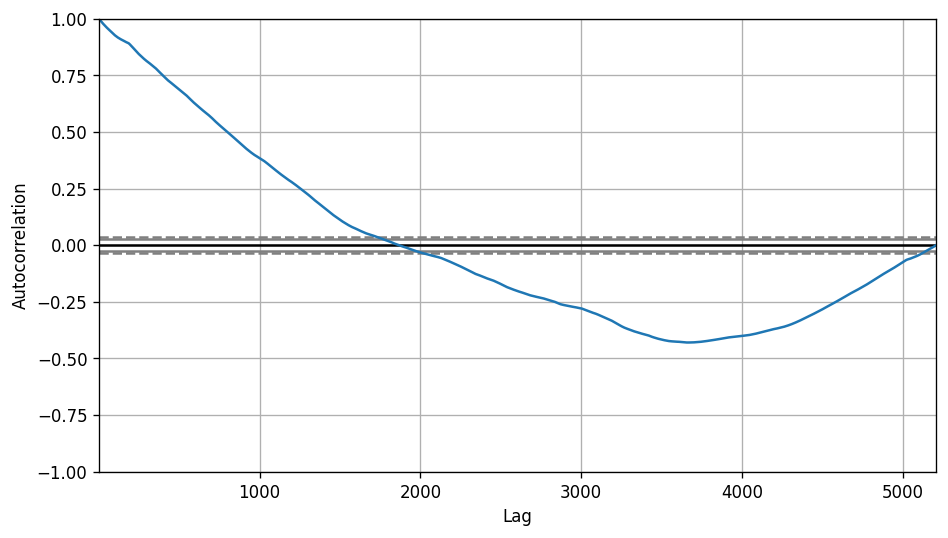

In [ ]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df50.Open.tolist())

#Missing value checks


In [ ]:
df50.head()
df50.fillna(method="ffill", inplace=True)

#Adding a new attribute, year, for plotting 

In [ ]:
df50['year'] = pd.DatetimeIndex(df50['Date']).year
df50['year']

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
5203    2020
5204    2020
5205    2020
5206    2020
5207    2020
Name: year, Length: 5208, dtype: int64

#**Plots for vizualisation**

## Year vs Opening price plot

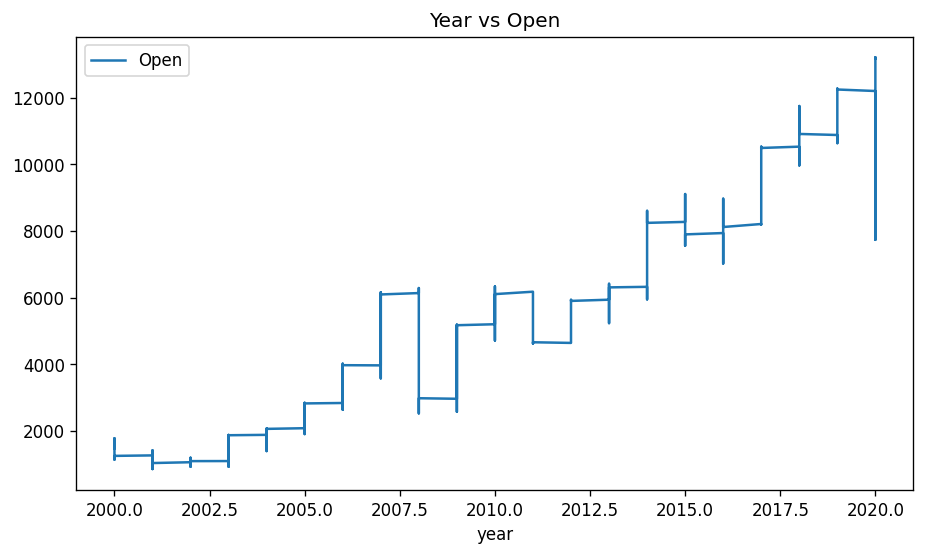

<Figure size 1200x1200 with 0 Axes>

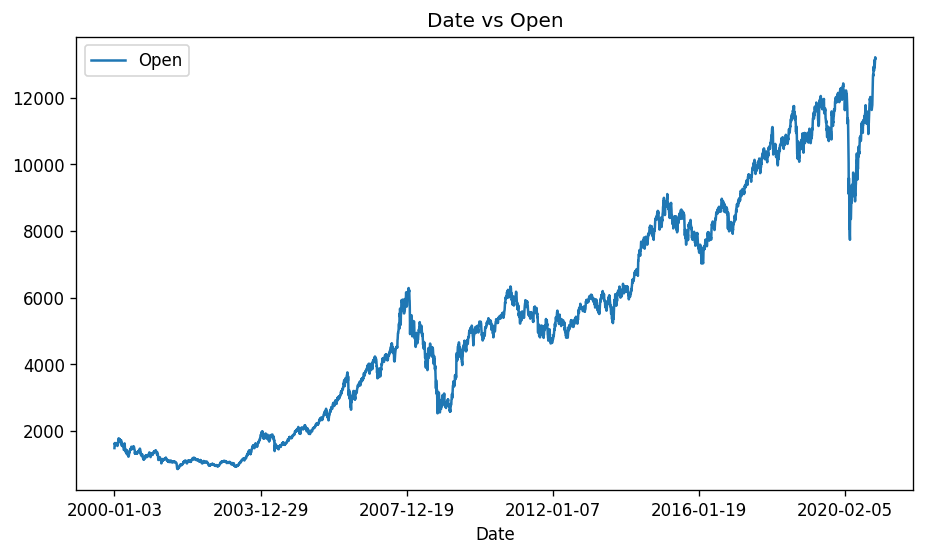

<Figure size 1200x1200 with 0 Axes>

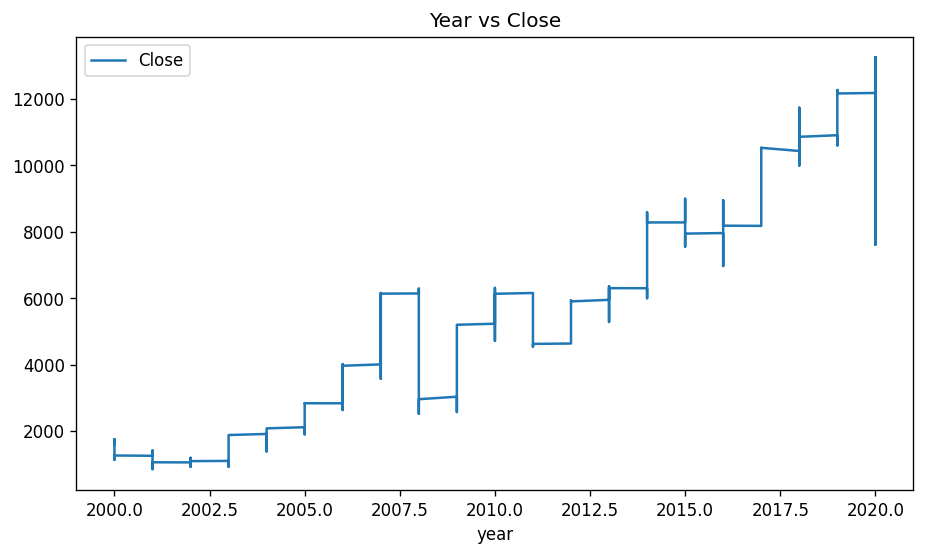

<Figure size 1200x1200 with 0 Axes>

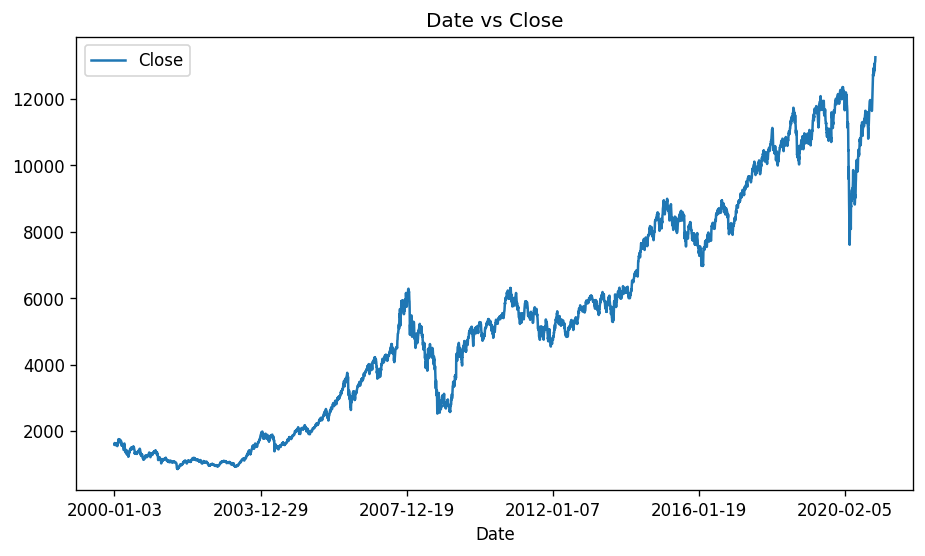

<Figure size 1200x1200 with 0 Axes>

In [ ]:
types=['Open', 'Close']
for ele in types:

    df50.plot(x='year',y=ele, kind='line')
    plt.title("Year vs {}".format(ele))
    plt.figure(figsize=(10,10))

    df50.plot(x='Date',y=ele, kind='line')
    plt.title("Date vs {}".format(ele))
    plt.figure(figsize=(10,10))

plt.show()


##Volume of stocks sold per year

No handles with labels found to put in legend.


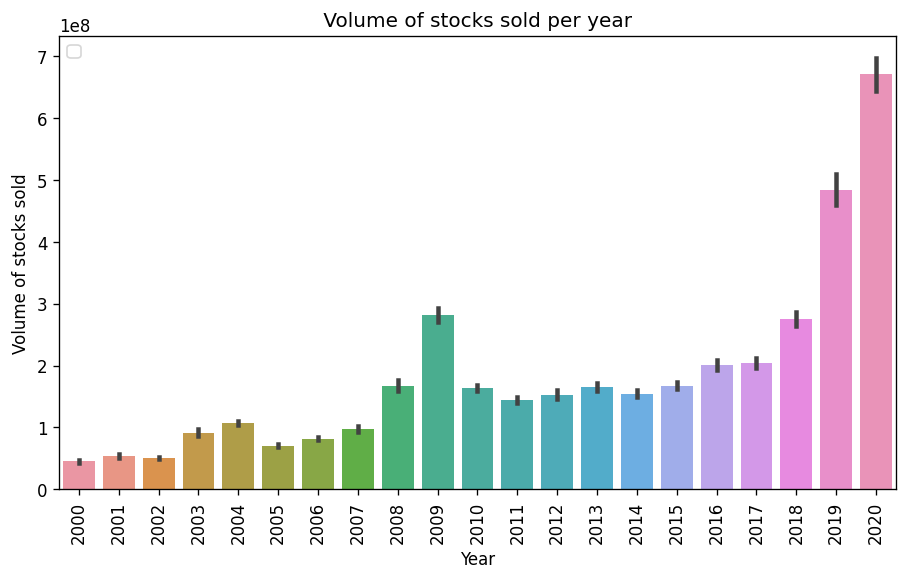

In [ ]:
sns.barplot(x=df50['year'], y=df50['Volume'])
plt.xlabel('Year')
plt.ylabel('Volume of stocks sold', )
plt.xticks(rotation=90)

plt.title(" Volume of stocks sold per year ")
plt.legend()
plt.show()

##Computing the trend value of the high attribute
calculated as follows:

high_dayn - high_dayn-1 = trend_value

In [ ]:
df50['TrendValue'] = 0
for i in range(1, len(df50['High'])):
    df50['TrendValue'][i] = df50['High'][i]-df50['High'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df50['Trend'] = 0

##Adding the trend attribute to determine the types of trend

In [ ]:
i=0
for val in df50['TrendValue']:
    if val>0:
        df50['Trend'][i] = 'Uptrend'
    elif val==0:
        df50['Trend'][i] = 'No change'
    else:
        df50['Trend'][i] = 'Downtrend'
    i = i+1

df50.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is tryi

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,year,TrendValue,Trend
0,2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95,2000,0,No change
1,2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92,2000,49,Uptrend
2,2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95,2000,-6,Downtrend
3,2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94,2000,3,Uptrend
4,2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94,2000,-10,Downtrend
5,2000-01-10,1615.65,1662.10,1614.95,1632.95,45013949,2.375350e+10,26.57,4.74,0.93,2000,33,Uptrend
6,2000-01-11,1633.25,1639.90,1548.25,1572.50,49120254,2.596950e+10,25.59,4.57,0.96,2000,-22,Downtrend
7,2000-01-12,1572.30,1631.55,1571.70,1624.80,38364961,1.895000e+10,26.44,4.72,0.93,2000,-8,Downtrend
8,2000-01-13,1627.85,1671.15,1613.65,1621.40,44738447,2.237610e+10,26.38,4.71,0.93,2000,39,Uptrend
9,2000-01-14,1622.15,1627.40,1591.40,1622.75,43292009,1.979980e+10,26.41,4.71,0.93,2000,-43,Downtrend


##Market performance 2010 to 2015

Plotted candlesticks using the go library


In [ ]:
nifty_50_2010= df50[(df50['Date'] >= '2010-01-01') & (df50['Date']<= '2015-01-01')]
nifty_50_2010.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,year,TrendValue,Trend
2496,2010-01-04,5200.90,5238.45,5167.10,5232.20,148652424,6.531610e+10,23.31,3.67,0.94,2010,16,Uptrend
2497,2010-01-05,5277.15,5288.35,5242.40,5277.90,240844424,7.969620e+10,23.57,3.71,0.93,2010,49,Uptrend
2498,2010-01-06,5278.15,5310.85,5260.05,5281.80,216147837,7.892600e+10,23.59,3.72,0.93,2010,22,Uptrend
2499,2010-01-07,5281.80,5302.55,5244.75,5263.10,181246734,6.890990e+10,23.51,3.70,0.93,2010,-8,Downtrend
2500,2010-01-08,5264.25,5276.75,5234.70,5244.75,201910800,7.777040e+10,23.43,3.69,0.94,2010,-25,Downtrend


In [ ]:
df=nifty_50_2010
fig = go.Figure(
    data=[go.Candlestick(
        x=df['Date'],
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        )]
        )

fig.update_xaxes(title = "Years")

fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
)

fig.show(renderer="colab")

#**Tree based regressor to predict P/E using Closing price**





##Random Forest Regressor

In [ ]:
x1 = df50.iloc[:, 4].values.reshape(-1, 1)
x1.shape

(5208, 1)

In [ ]:
x = df50.iloc[:, 4].values.reshape(-1, 1)
y = df50.iloc[:, 7].values.reshape(-1, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
print("X_train shape: {}\n".format(x_train.shape))
print("X_test shape: {}\n".format(x_test.shape))
print("Y_train shape: {}\n".format(y_train.shape))
print("Y_test shape: {}\n".format(y_test.shape))

X_train shape: (3906, 1)

X_test shape: (1302, 1)

Y_train shape: (3906, 1)

Y_test shape: (1302, 1)



In [ ]:
rf.fit(x_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
print("Score: {}".format(str(rf.score(y_test, y_pred))))

Score: 0.4070509591313618


##Hyperparameter Optimization using GridSearch library

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
param_grid = {
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'criterion': ['mse', 'mae']
}

In [ ]:
#grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = KFold(random_state=2), verbose = 10)
#grid_results = grid.fit(x, y.ravel())

In [ ]:
#print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
#means = grid_results.cv_results_['mean_test_score']
#stds = grid_results.cv_results_['std_test_score']
#params = grid_results.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print('{0} ({1}) with: {2}'.format(mean, stdev, param))

#**Long Short Term Memory**

In [ ]:
forecast_days = 60

def getdata(df50):
    training_set = df50.iloc[0:4000, 1:2].values
    training_set_scaled = scaler.fit_transform(training_set)
    x_train = []
    y_train = []

    for i in range(forecast_days, len(training_set_scaled)):
        x_train.append(training_set_scaled[i-forecast_days:i, 0])
        y_train.append(training_set_scaled[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    return x_train, y_train

In [ ]:
x_train, y_train = getdata(df50)

In [ ]:
x_train.shape

(3940, 60)

Reshaping input dimensions to match RNN requirments 

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(3940, 60, 1)

In [ ]:
def build_LSTM():

    regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    #regressor.add(LSTM(units = 50, return_sequences=True))
    #regressor.add(Dropout(0.2))

    #regressor.add(LSTM(units = 50))
    #regressor.add(Dropout(0.2))

    regressor.add(Dense(units=1))

In [ ]:
regressor = Sequential()
units = 50
build_LSTM()

##Compiling and fitting

Since we are not doing classification, loss is not binary_cross_entropy and is mean_squared_error for regression.



In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae', 'mape'])

In [ ]:
history = regressor.fit(x_train, y_train, epochs=25, batch_size=32, verbose=1)

Epoch 1/25
124/124 [==============================] - 5s 26ms/step - loss: 0.0440 - mae: 0.1378 - mape: 1193.3648
Epoch 2/25
124/124 [==============================] - 3s 27ms/step - loss: 0.0082 - mae: 0.0546 - mape: 41207.5486
Epoch 3/25
124/124 [==============================] - 3s 28ms/step - loss: 0.0060 - mae: 0.0482 - mape: 3735.6132
Epoch 4/25
124/124 [==============================] - 3s 28ms/step - loss: 0.0048 - mae: 0.0441 - mape: 398.4462
Epoch 5/25
124/124 [==============================] - 3s 27ms/step - loss: 0.0043 - mae: 0.0424 - mape: 15756.3655
Epoch 6/25
124/124 [==============================] - 3s 28ms/step - loss: 0.0039 - mae: 0.0411 - mape: 5939.7582
Epoch 7/25
124/124 [==============================] - 3s 28ms/step - loss: 0.0036 - mae: 0.0399 - mape: 10895.9530
Epoch 8/25
124/124 [==============================] - 3s 27ms/step - loss: 0.0033 - mae: 0.0384 - mape: 19955.3678
Epoch 9/25
124/124 [==============================] - 3s 27ms/step - loss: 0.0031 - m

In [ ]:
regressor.save(base_path+'model1layer.h5')

In [ ]:
model = load_model(base_path+'model_100.h5')

## Testing model on Nifty 50 data


In [ ]:
df50['Close'].shape[0]

5208

In [ ]:
def get_testdata(df50):

    dataset_test = df50[4000:df50['Close'].shape[0]]

    real_stock_price = dataset_test.iloc[0:len(dataset_test), 1:2].values

    dataset_total = df50['Open']

    inputs = dataset_total[len(dataset_total) - len(dataset_test) - forecast_days:].values

    inputs  = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    return inputs, real_stock_price
    

In [ ]:
inputs, real_stock_price = get_testdata(df50)

Creating the timestamp test dataset

In [ ]:
x_test = []

for i in range(forecast_days,  len(inputs)):
    x_test.append(inputs[i-forecast_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
result = model.predict(x_test)

Inverse transforming the result set to cancel the applied scaling

In [ ]:
result_set = scaler.inverse_transform(result)

In [ ]:
def print_shapes():
    
    print("X_train shape: {}\n".format(x_train.shape))
    print("X_test shape: {}\n".format(x_test.shape))
    print("Y_train shape: {}\n".format(y_train.shape))
    print("Y_test shape: {}\n".format(real_stock_price.shape))
    print("Result shape: {}\n".format(result_set.shape))

print_shapes()

X_train shape: (3940, 60, 1)

X_test shape: (1208, 60, 1)

Y_train shape: (3940,)

Y_test shape: (1208, 1)

Result shape: (1208, 1)



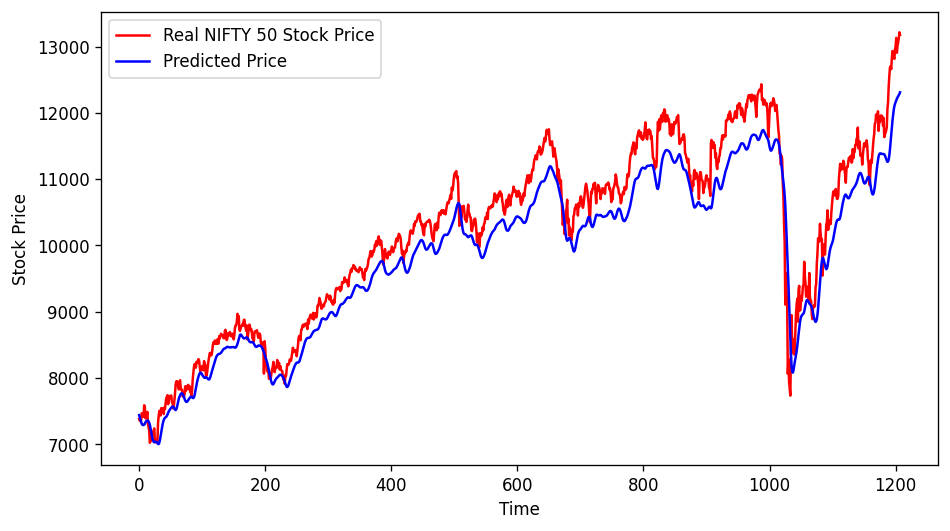

In [ ]:
def prediction_plot():
    plt.plot(real_stock_price, color="red", label = 'Real NIFTY 50 Stock Price')
    plt.plot(result_set, color="blue", label="Predicted Price")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

prediction_plot()


In [ ]:
def plotting(metric):

    plt.plot(history.history[metric])
    plt.title('Model {}'.format(str(metric)))
    plt.ylabel(str(metric))
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.figure(figsize=(10,10))
    plt.show()
    


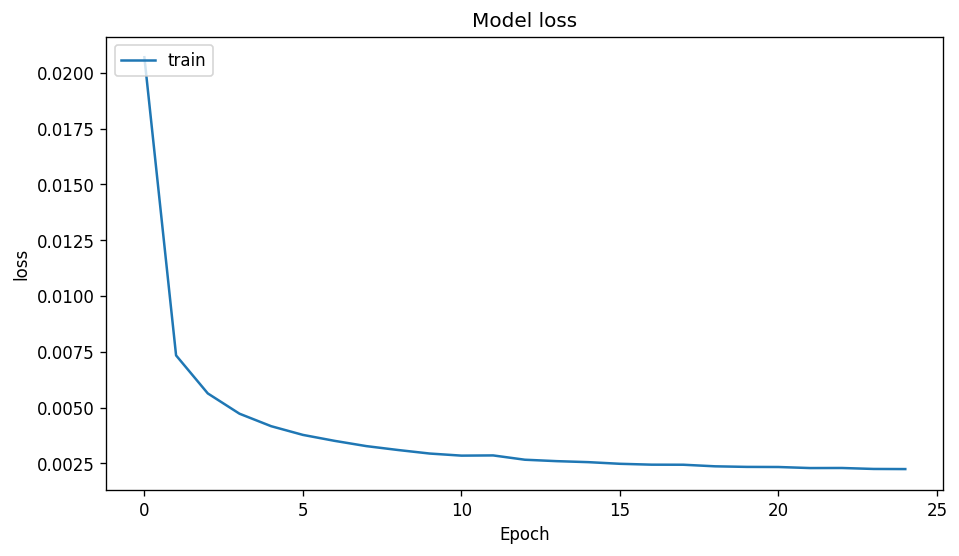

<Figure size 1200x1200 with 0 Axes>

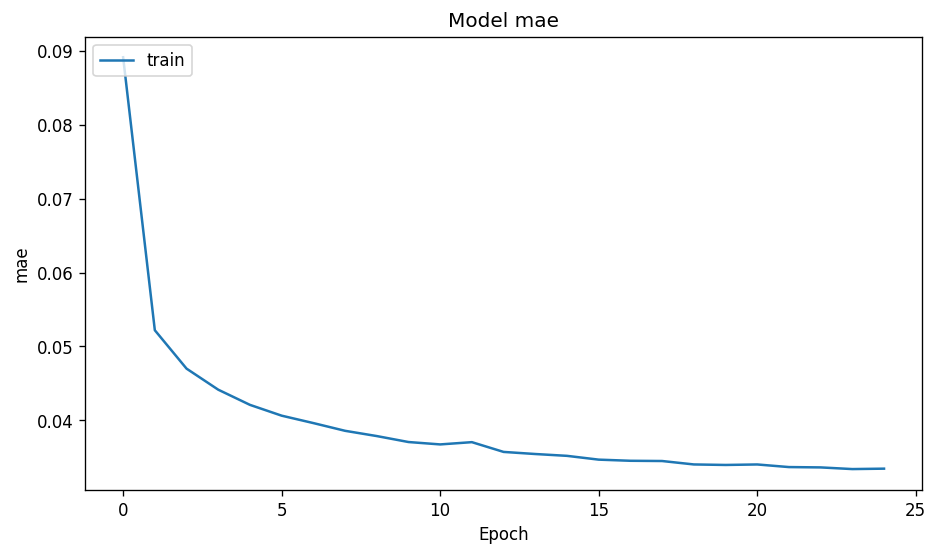

<Figure size 1200x1200 with 0 Axes>

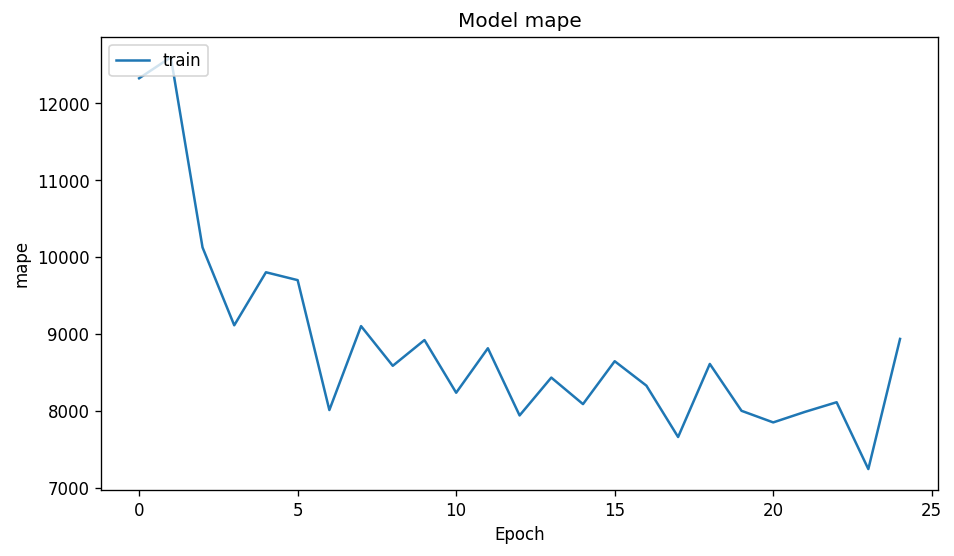

<Figure size 1200x1200 with 0 Axes>

In [ ]:
metrics = ['loss','mae','mape']
for metric in metrics:
    plotting(metric)

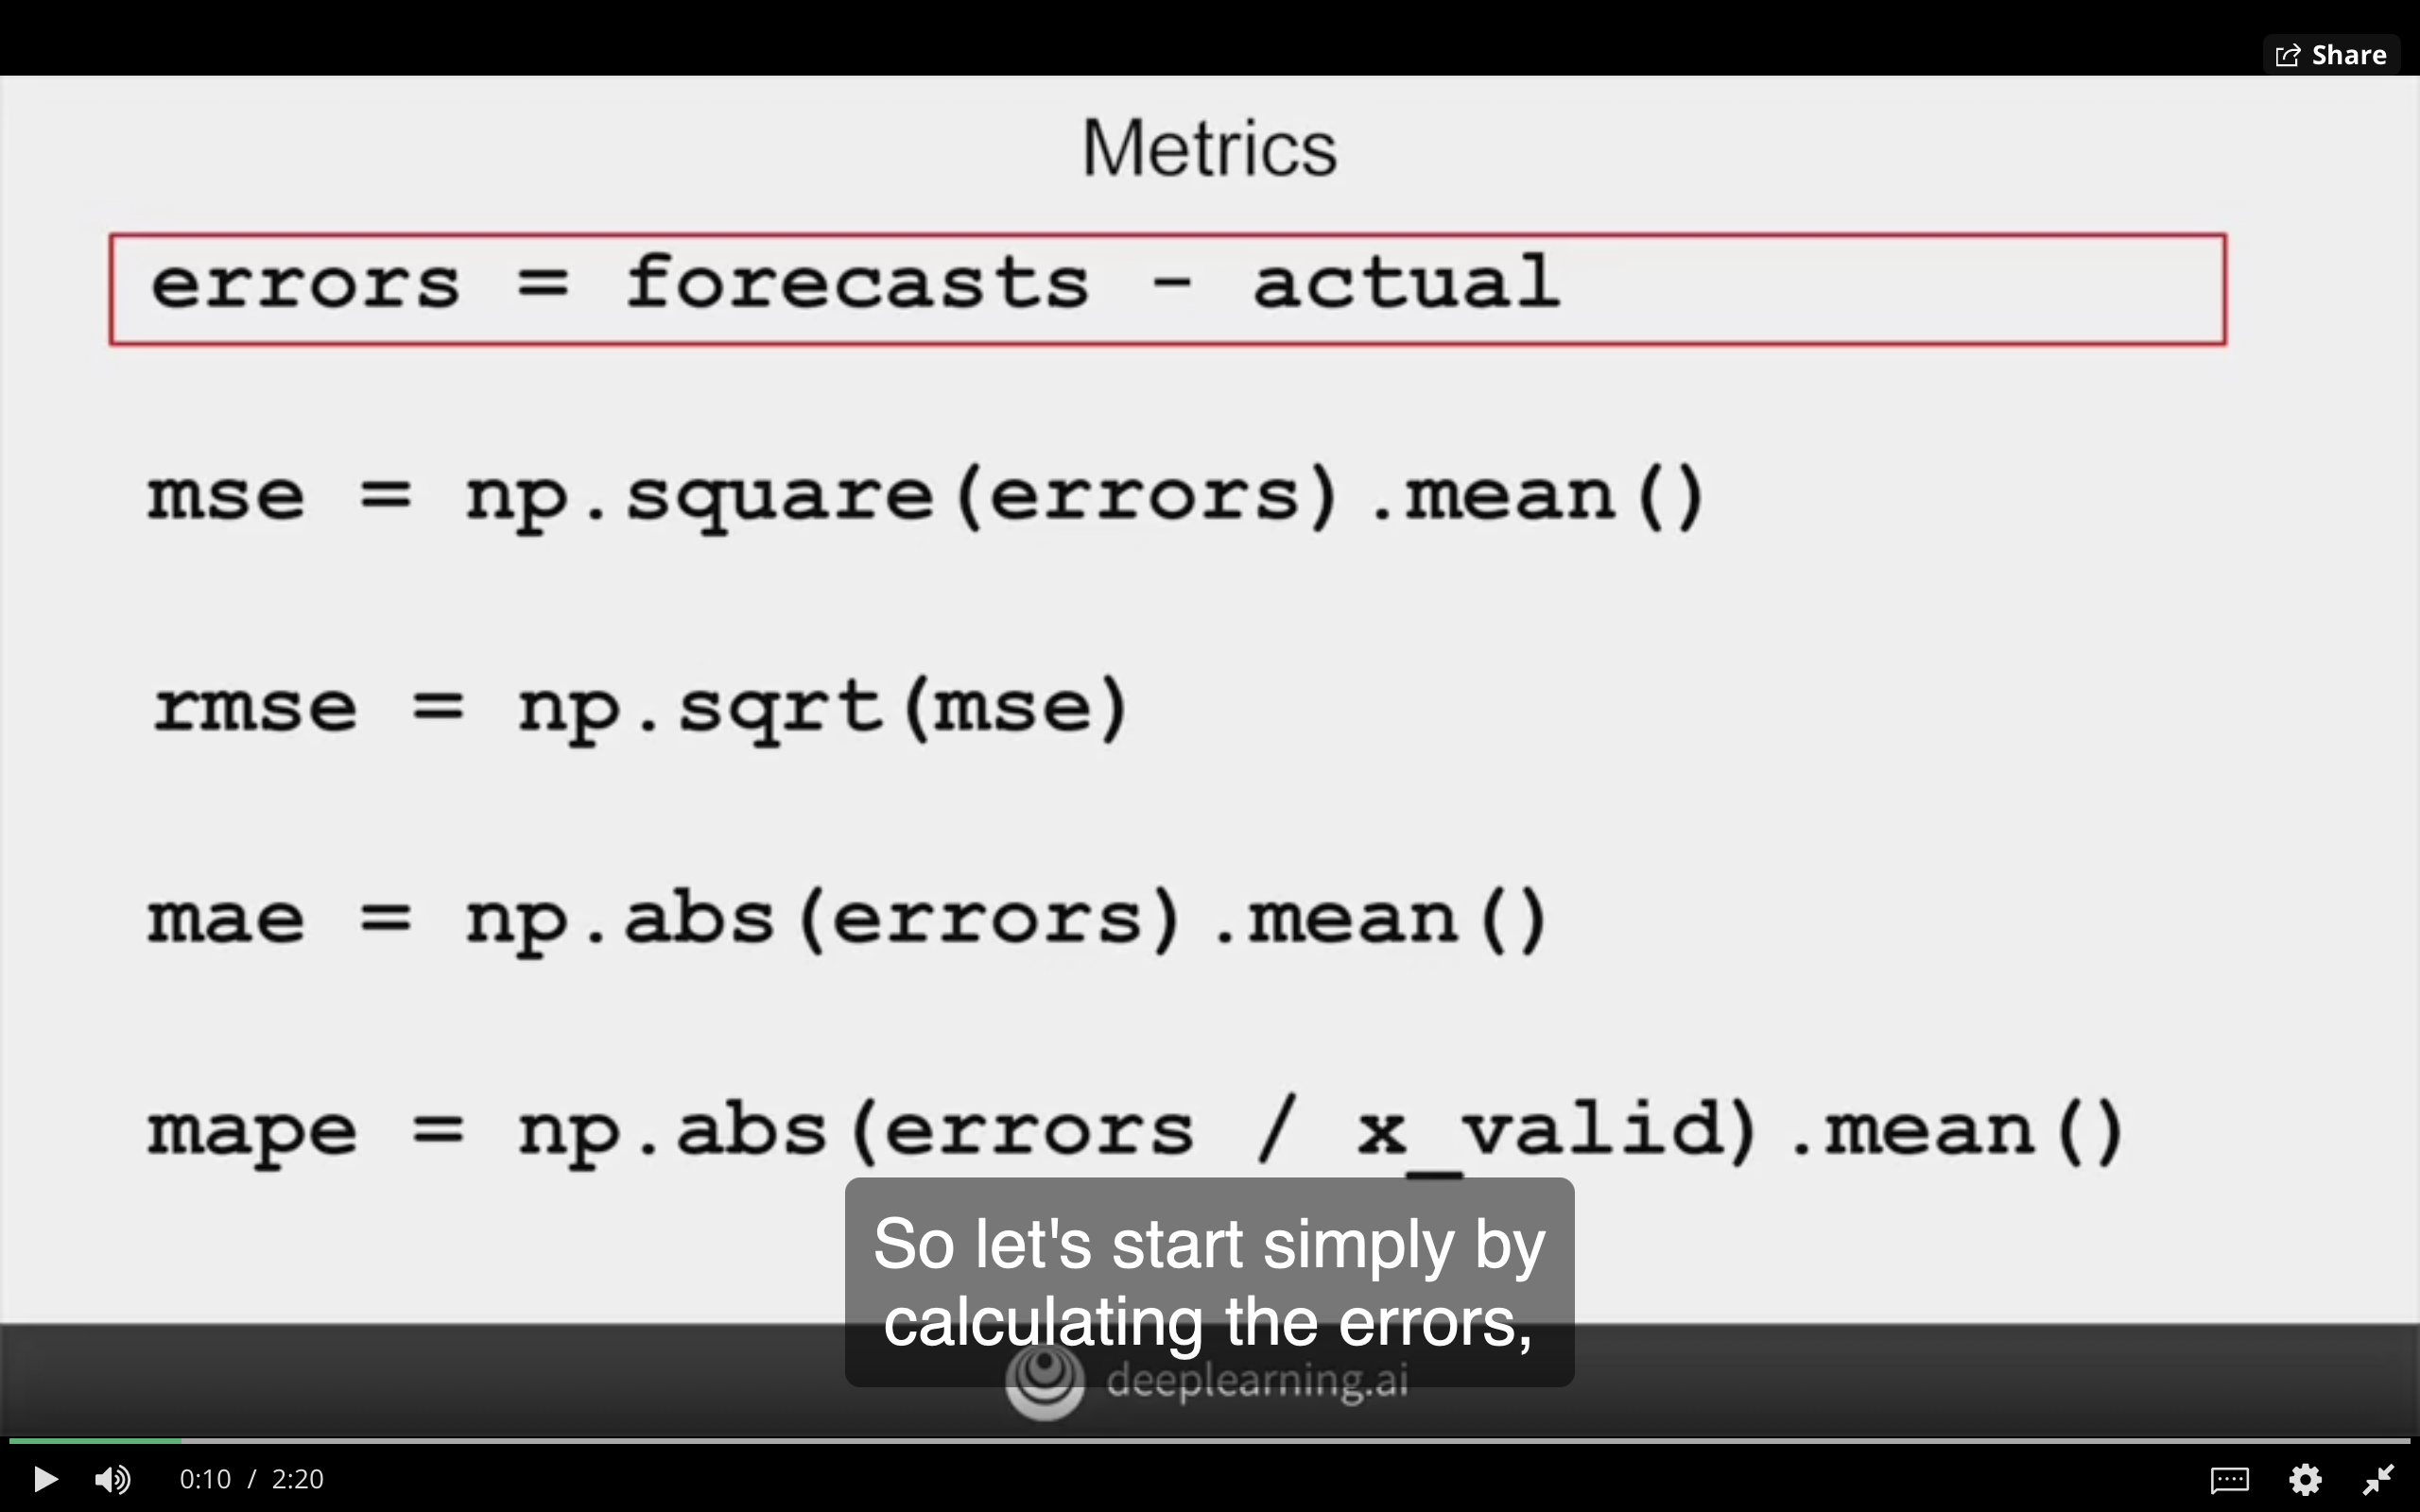

MSE - We square mse to get rid of -ve values. If error was 2 points above actual value (+2) and another was 2 points below the value (-2), they can cancel each other out. But we technically have 2 errors. So we square them. 

MAE - we just use absolute value, does not penalize the large values as much as MSE does

Use MSE if large errors are dangerous and cost more than small

Use MSE if gain or loss is proportional to values

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, r2_score

mae = mean_absolute_error(real_stock_price, result_set)
r2=r2_score(real_stock_price, result_set)

print("Mean Absolute Error: {}".format(mae))

print("R2 Score: {}".format(r2))


Mean Absolute Error: 376.02953988384735
R2 Score: 0.9022873894212974


In [ ]:
def get_errors():
    
    errors = []

    for i in range(0, len(real_stock_price)):
        errors.append(result_set[i]-real_stock_price[i])
    
    mse = np.square(errors).mean()
    rmse= np.sqrt(mse)

    print("Mean Squared Error: {}\n".format(mse))
    print("Root Mean Squared Error: {}\n".format(rmse))

get_errors()

Mean Squared Error: 188094.2160438073

Root Mean Squared Error: 433.69830071584016



##Predicting future data

In [ ]:
minimum = int(min(df50['Open']))
maximum = int(max(df50['Open']))

In [ ]:
def get_random_data():
    real_data1 = []
    for i in range(0, forecast_days-1):
        ele = random.randint(minimum, maximum)
        #print(ele)
        real_data1.append(ele)
    real_data = np.array(real_data1).reshape(1,-1)
    real_data = scaler.transform(real_data)
    real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
    return real_data

def printans(prediction):
    answer = str(prediction).strip("[[]]")
    print("The model predicts {} as the forecast for the next day ".format(answer))

In [ ]:
real_data = get_random_data()
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
printans(prediction)

The model predicts 6872.898 as the forecast for the next day 


#Indicators

##Relative Strength Indicator

In [ ]:
df50['TrendValue'][0] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

upday, downday = df50.copy(), df50.copy()

In [ ]:
type(upday)

pandas.core.frame.DataFrame

In [ ]:
upday.loc['TrendValue'] = upday.loc[(upday['TrendValue']<0), 'TrendValue' ] = 0
downday.loc['TrendValue'] = downday.loc[(downday['TrendValue']>0), 'TrendValue' ] = 0

In [ ]:
downday['TrendValue'] = downday['TrendValue'].abs()

In [ ]:
ewmup = upday['TrendValue'].transform(lambda x: x.ewm(span = 20).mean())

In [ ]:
ewmdown = downday['TrendValue'].transform(lambda x: x.ewm(span = 20).mean())

In [ ]:
relative_strength = ewmup/ewmdown

In [ ]:
RSI = (100.0 - (1.0/100+relative_strength))

In [ ]:
df50['Up Days'] = upday['TrendValue']
df50['Down Days'] = downday['TrendValue']
df50['RSI'] = RSI

In [ ]:
df50['Prediction'] = np.nan

##Price rate of change

In [ ]:
df50['Close Rateofchange'] = df50['Close'].transform(lambda x: x.pct_change(periods = 20))

##On balance volume

In [ ]:
obv= []
obv.append(0)

for i in range(1, len(df50['Close'])):
    if df50['Close'][i] > df50['Close'][i-1]:
        obv.append( obv[-1] + df50['Volume'][i])
    elif df50['Close'][i] < df50['Close'][i-1]:
        obv.append( obv[-1] - df50['Volume'][i])
    else:
        obv.append(obv[-1])

In [ ]:
df50['OBV'] = obv

##Volume Weighted Average Price

In [ ]:
close_mean = df50['Close'].mean()
print("Mean closing price: {:.2f} Rs".format(close_mean))

Mean closing price: 5381.37 Rs


In [ ]:
period = 20
vwap = []
for i in range(0,len(df50)):
        if(i>=period):
            numerator = sum(df50["Close"][i-period:i]*df50["Volume"][i-period:i])
            denomenator = sum(df50["Volume"][i-period:i])
            vwap.append(numerator/denomenator)
        else:
            vwap.append(None)

In [ ]:
df50['VWAP'] = vwap

In [ ]:
df50.head(30)

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,year,TrendValue,Trend,Up Days,Down Days,RSI,Prediction,Close Rateofchange,OBV,VWAP
0,2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95,2000,NaN,No change,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92,2000,49.0,Uptrend,49.0,0.0,-inf,NaN,NaN,38787872,NaN
2,2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95,2000,-6.0,Downtrend,0.0,6.0,92.601111,NaN,NaN,-23365559,NaN
3,2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94,2000,3.0,Uptrend,3.0,0.0,92.048480,NaN,NaN,27907316,NaN
4,2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94,2000,-10.0,Downtrend,0.0,10.0,97.374225,NaN,NaN,-26408629,NaN
5,2000-01-10,1615.65,1662.10,1614.95,1632.95,45013949,2.375350e+10,26.57,4.74,0.93,2000,33.0,Uptrend,33.0,0.0,94.928226,NaN,NaN,18605320,NaN
6,2000-01-11,1633.25,1639.90,1548.25,1572.50,49120254,2.596950e+10,25.59,4.57,0.96,2000,-22.0,Downtrend,0.0,22.0,98.183717,NaN,NaN,-30514934,NaN
7,2000-01-12,1572.30,1631.55,1571.70,1624.80,38364961,1.895000e+10,26.44,4.72,0.93,2000,-8.0,Downtrend,0.0,8.0,98.554724,NaN,NaN,7850027,NaN
8,2000-01-13,1627.85,1671.15,1613.65,1621.40,44738447,2.237610e+10,26.38,4.71,0.93,2000,39.0,Uptrend,39.0,0.0,97.448007,NaN,NaN,-36888420,NaN
9,2000-01-14,1622.15,1627.40,1591.40,1622.75,43292009,1.979980e+10,26.41,4.71,0.93,2000,-43.0,Downtrend,0.0,43.0,98.907689,NaN,NaN,6403589,NaN


In [ ]:
df50['Prediction Value'] = 0

In [ ]:
for i in range(len(df50)):
    if df50['Up Days'][i]>0:
        df50['Prediction Value'][i] = 1
    elif df50['Down Days'][i]>0:
        df50['Prediction Value'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df50.head(30)

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,year,TrendValue,Trend,Up Days,Down Days,RSI,Prediction,Close Rateofchange,OBV,VWAP,Prediction Value
0,2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,25.91,4.63,0.95,2000,NaN,No change,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,26.67,4.76,0.92,2000,49.0,Uptrend,49.0,0.0,-inf,NaN,NaN,38787872,NaN,1
2,2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,25.97,4.64,0.95,2000,-6.0,Downtrend,0.0,6.0,92.601111,NaN,NaN,-23365559,NaN,0
3,2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,26.32,4.70,0.94,2000,3.0,Uptrend,3.0,0.0,92.048480,NaN,NaN,27907316,NaN,1
4,2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,26.25,4.69,0.94,2000,-10.0,Downtrend,0.0,10.0,97.374225,NaN,NaN,-26408629,NaN,0
5,2000-01-10,1615.65,1662.10,1614.95,1632.95,45013949,2.375350e+10,26.57,4.74,0.93,2000,33.0,Uptrend,33.0,0.0,94.928226,NaN,NaN,18605320,NaN,1
6,2000-01-11,1633.25,1639.90,1548.25,1572.50,49120254,2.596950e+10,25.59,4.57,0.96,2000,-22.0,Downtrend,0.0,22.0,98.183717,NaN,NaN,-30514934,NaN,0
7,2000-01-12,1572.30,1631.55,1571.70,1624.80,38364961,1.895000e+10,26.44,4.72,0.93,2000,-8.0,Downtrend,0.0,8.0,98.554724,NaN,NaN,7850027,NaN,0
8,2000-01-13,1627.85,1671.15,1613.65,1621.40,44738447,2.237610e+10,26.38,4.71,0.93,2000,39.0,Uptrend,39.0,0.0,97.448007,NaN,NaN,-36888420,NaN,1
9,2000-01-14,1622.15,1627.40,1591.40,1622.75,43292009,1.979980e+10,26.41,4.71,0.93,2000,-43.0,Downtrend,0.0,43.0,98.907689,NaN,NaN,6403589,NaN,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', oob_score=True)

In [ ]:
df = df50.copy()

In [ ]:
df.head()
df.drop(columns=['Prediction'], inplace=True)

In [ ]:
df.dropna(how='any', inplace=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,year,TrendValue,Trend,Up Days,Down Days,RSI,Close Rateofchange,OBV,VWAP,Prediction Value
20,2000-02-01,1546.20,1554.15,1521.40,1549.50,37161352,1.692070e+10,25.13,4.51,0.98,2000,-44.0,Downtrend,0.0,44.0,99.454319,-0.026818,-112832934,1608.155167,0
21,2000-02-02,1554.20,1605.90,1554.20,1588.00,39358471,1.760180e+10,25.75,4.62,0.95,2000,51.0,Uptrend,51.0,0.0,99.077020,-0.030939,-73474463,1606.096399,1
22,2000-02-03,1591.25,1616.70,1591.25,1597.90,40826374,1.538890e+10,25.91,4.65,0.95,2000,10.0,Uptrend,10.0,0.0,98.995252,0.001316,-32648089,1603.805144,1
23,2000-02-04,1598.50,1621.35,1596.45,1599.75,30459542,1.694660e+10,25.94,4.65,0.94,2000,4.0,Uptrend,4.0,0.0,98.959102,-0.011035,-2188547,1604.109925,1
24,2000-02-07,1599.80,1645.90,1599.80,1636.60,34666978,2.036070e+10,26.54,4.76,0.92,2000,24.0,Uptrend,24.0,0.0,98.719372,0.014442,32478431,1603.105262,1


In [ ]:
x = df[['RSI', 'Close Rateofchange','OBV','VWAP']]
y = df[['Prediction Value']]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
classifier.fit(x_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print("Accuracy of the Classifier: {}\n".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print("Classification Report:\n")
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy of the Classifier: 0.640655105973025

Confusion Matrix:

[[281 185]
 [188 384]]


Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.60      0.60       466
           1       0.67      0.67      0.67       572

    accuracy                           0.64      1038
   macro avg       0.64      0.64      0.64      1038
weighted avg       0.64      0.64      0.64      1038



#**Flask**

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    return "<h1>Flask on Colab nice</h1>"
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://6305f1f7fd6a.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [19/May/2021 14:24:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/May/2021 14:24:33] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [19/May/2021 14:24:52] "GET / HTTP/1.1" 200 -
